# Diabetes-Dataset
In this project we did Principal Component Analysis on the Diabetes dataset, and along with PCA, we created a scatter plot for the PCA, with the red dots representing diabetic patients and the green dots representing non-diabetic patients.

In [1]:
#Importing all the necesarry libraries.

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [46]:
#Importing the dataset

df = pd.read_csv("diabetes.csv")

In [47]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [48]:
col=df.columns
features=col.tolist() 
feature=features[:-1] 
target=features[-1]
X=df.loc[:,feature].values  
y=df.loc[:,target].values

#Inorder to reduce the difference between the values amongst the columns, Standard Scaler is implemented.

ss=StandardScaler()  
X=ss.fit_transform(X) 
pd.DataFrame(X,columns=feature).head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [49]:
#To reduce dimensionality, executing PCA

pca=PCA(n_components=2) 

In [50]:
#Define the PCA Components

PC=pca.fit_transform(X) 
PrincipalDf=pd.DataFrame(data=PC,columns=['First Principal Component','Second Principal Component']) 
PrincipalDf.head(10)

,First Principal Component,Second Principal Component
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819
5,-1.435751,0.835577
6,-0.930176,-1.107940
7,-2.149806,0.855902
8,3.297925,-0.242155
9,-1.839850,3.206661


In [51]:
# Creating a new dataframe concatenating the Principal Components and the Outcome from the initial dataframe

ConcatDf=pd.concat([PrincipalDf,df[['Outcome']]],axis=1)
ConcatDf.head(10)

,First Principal Component,Second Principal Component,Outcome
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,0
4,2.359334,-2.184819,1
5,-1.435751,0.835577,0
6,-0.930176,-1.107940,1
7,-2.149806,0.855902,0
8,3.297925,-0.242155,1
9,-1.839850,3.206661,1


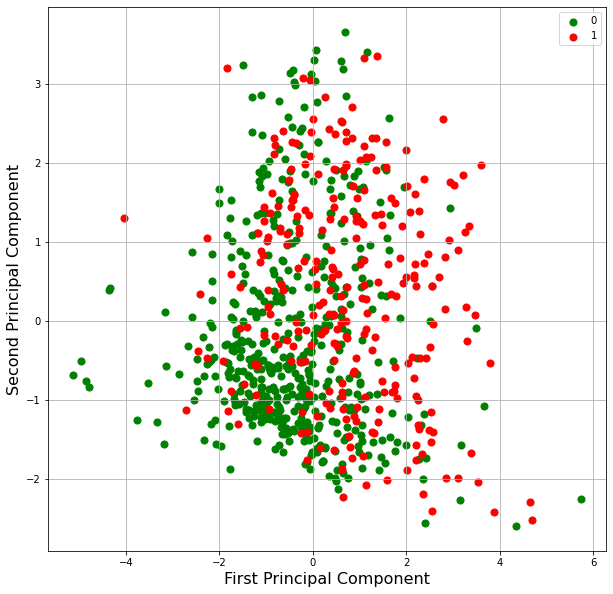

In [52]:
#Plot the Scatter plot for PCA where the red dots display the diabetic patients whereas the green denote Non-Diabetic patients

figure=plt.figure(figsize=(10,10))  
axes=figure.add_subplot(1,1,1)  
axes.set_xlabel('First Principal Component',fontsize = 16)  
axes.set_ylabel('Second Principal Component',fontsize = 16)    
Outcomes=[0,1]
colors=['g','r']  #green -> non-diabetic, red -> diabetic
for Outcome,color in zip(Outcomes,colors):
    indicesToKeep = ConcatDf['Outcome'] == Outcome 
    axes.scatter(ConcatDf.loc[indicesToKeep,'First Principal Component'],ConcatDf.loc[indicesToKeep,'Second Principal Component'],
              c=color,s=50)
axes.legend(Outcomes)  
axes.grid()

## How we selected the appropriate principal components.

- Principal Component Analysis is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
- The goal of PCA is to keep as much information as feasible while reducing the number of variables in a data collection

- There are three steps on which Principal Component works.

-STEP 1: STANDARDIZATION

- This step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.
- We perform standardization because if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.
- This can be done mathematically by subtracting the mean and dividing by the standard deviation for each value of each variable.

-STEP 2: COVARIANCE MATRIX COMPUTATION

- The goal of this step is to understand how the variables of the input data set are varying from the mean with respect to each other. This step is executed because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix. The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables.
- The sign of the covariance matters the most: 
- if positive then : the two variables increase or decrease together (correlated)
- if negative then : One increases when the other decreases (Inversely correlated)

-STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS

- We compute the eigenvectors and eigenvalues from the covariance matrix in order to determine the principal components of the data.
- Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on.
- Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has.

-STEP 4: FEATURE VECTOR

- In this step it choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.

-STEP 5: RECAST THE DATA ALONG THE PRINCIPAL COMPONENTS AXES

- The aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.